# Classification Model

## Importing importance libraries

In [1]:
# Import the necessary modules

# numerical operation
import numpy as np

# data visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# train test split
from sklearn.model_selection import train_test_split

# model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


# Evalution
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report





## Loading Dataset

In [2]:
train_data = pd.read_csv("train_dataset.csv")
train_data.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,...,Jorapokhar,Kochi,Kolkata,Lucknow,Mumbai,Patna,Shillong,Talcher,Thiruvananthapuram,Visakhapatnam
0,78.2,90.85,1.37,40.01,36.37,19.52,1.00,8.42,37.71,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,78.2,90.85,1.37,27.75,19.73,19.52,0.02,8.42,37.71,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,78.2,90.85,1.37,19.32,11.08,19.52,0.08,8.42,37.71,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,78.2,90.85,1.37,16.45,9.20,19.52,0.30,8.42,25.78,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,78.2,90.85,1.37,14.90,7.85,19.52,0.12,8.42,37.71,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
train_dataset = train_data.drop(columns=["AQI_Bucket"])

## Features Selection for classification

In [4]:
X = train_dataset
y = train_data["AQI_Bucket"]

## Train Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling

# 1. Logistic Regression

In [6]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

C:\Users\Thinkpad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Evalutaion

### Accuracy

In [7]:
# logistic regression prediction 
lr_y_pred = lr_model.predict(X_test)

# accuracy
lr_accur = accuracy_score(y_true=y_test, y_pred=lr_y_pred)
print(f"LogisticRegression accuracy score is {round(lr_accur, 3) * 100}")

LogisticRegression accuracy score is 87.5


# F1 Score

In [8]:
lr_f1_score = f1_score(y_true=y_test, y_pred=lr_y_pred, average="weighted")
print(f"LogisticRegression f1 score is {round(lr_f1_score,3) * 100}")

LogisticRegression f1 score is 86.6


## Confusion Matrix

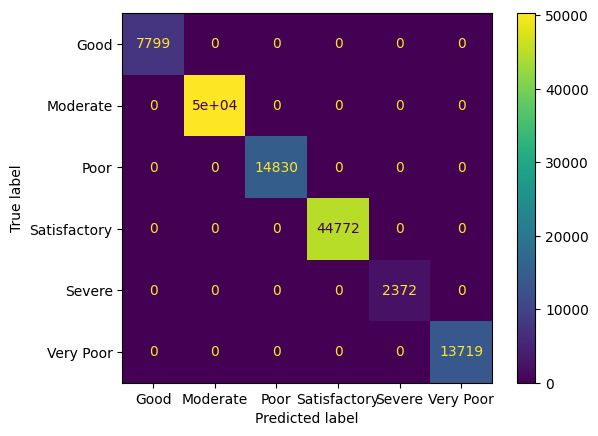

In [9]:
ConfusionMatrixDisplay.from_estimator(lr_model, X_test, lr_y_pred)

## Classification Report

In [10]:
print(classification_report(y_true=y_test, y_pred=lr_y_pred))

              precision    recall  f1-score   support

        Good       0.77      0.67      0.72      8909
    Moderate       0.86      0.93      0.89     46493
        Poor       0.88      0.87      0.88     15043
Satisfactory       0.90      0.93      0.92     43376
      Severe       0.58      0.22      0.32      6307
   Very Poor       0.94      0.95      0.94     13631

    accuracy                           0.88    133759
   macro avg       0.82      0.76      0.78    133759
weighted avg       0.87      0.88      0.87    133759



# 2. Decision Tree Classification

In [11]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, y_train)

DecisionTreeClassifier()

# Evalution

### Accuracy

In [12]:
dtc_model_y_pred = dtc_model.predict(X_test)
dtc_model_y_pred_accur = accuracy_score(y_true=y_test, y_pred=dtc_model_y_pred)
print(f"DecisionTreeClassifier accuracy score is {round(dtc_model_y_pred_accur,3) * 100}")

DecisionTreeClassifier accuracy score is 99.8


### F1 score

In [13]:
dtc_f1_score = f1_score(y_true=y_test, y_pred=dtc_model_y_pred, average="weighted")
print(f"DecisionTreeClassifier f1 score is {round(dtc_f1_score,3) * 100}")


DecisionTreeClassifier f1 score is 99.8


# Classification Report

In [14]:
print(classification_report(y_true=y_test, y_pred=dtc_model_y_pred))

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00      8909
    Moderate       1.00      1.00      1.00     46493
        Poor       1.00      1.00      1.00     15043
Satisfactory       1.00      1.00      1.00     43376
      Severe       0.99      0.99      0.99      6307
   Very Poor       1.00      1.00      1.00     13631

    accuracy                           1.00    133759
   macro avg       1.00      1.00      1.00    133759
weighted avg       1.00      1.00      1.00    133759



# 3. Random Forest Classification

In [15]:
rfc_model = RandomForestClassifier(max_depth=2, random_state=42)
rfc_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=42)

# Evaluation

### Accuracy

In [16]:
rfc_model_y_pred = dtc_model.predict(X_test)
rfc_model_y_pred_accur = accuracy_score(y_true=y_test, y_pred=rfc_model_y_pred)
print(f"RandomForestClassifier accuracy score is {round(rfc_model_y_pred_accur,3) * 100}")

RandomForestClassifier accuracy score is 99.8


### F1 Score

In [17]:
rfc_f1_score = f1_score(y_true=y_test, y_pred=rfc_model_y_pred, average="weighted")
print(f"RandomForestClassifier f1 score is {round(rfc_f1_score,3) * 100}")


RandomForestClassifier f1 score is 99.8


# Classification Report

In [18]:

print(classification_report(y_true=y_test, y_pred=rfc_model_y_pred))

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00      8909
    Moderate       1.00      1.00      1.00     46493
        Poor       1.00      1.00      1.00     15043
Satisfactory       1.00      1.00      1.00     43376
      Severe       0.99      0.99      0.99      6307
   Very Poor       1.00      1.00      1.00     13631

    accuracy                           1.00    133759
   macro avg       1.00      1.00      1.00    133759
weighted avg       1.00      1.00      1.00    133759



# Hyperparameter tuning

In [19]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 6)]
max_depth = [int(x) for x in np.linspace(start = 5, stop = 30, num = 4)]

In [20]:
random_grid = {
    'n_estimators' : n_estimators,
    'max_features': ['auto', 'sqrt'],
    'max_depth' : max_depth,
    'min_samples_split': [5, 10, 10, 100]
}
random_forest_model = RandomForestClassifier(max_depth=2, random_state=42)

rf_random = RandomizedSearchCV(estimator = random_forest_model, param_distributions = random_grid, cv = 3, verbose = 2,
                  n_jobs = -1 )

In [21]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


KeyboardInterrupt: 

### Hyperparameter tunnig take huge time to execute with this dateset of 650000 enteris. Between Logistic Regression and Decision Tree, decision tree stats seems to be better so i prefer Decision tree to create model to deploy for now.

### We want to serialize model

In [22]:
import pickle
with open("classification_model.pickle","wb") as file:
    pickle.dump(dtc_model, file)

### Deserialization

In [23]:
with open("classification_model.pickle","rb") as file:
    model = pickle.load(file)

In [25]:
dump_model_pred = model.predict(X_test)
# classification report
print(classification_report(y_true=y_test, y_pred=dump_model_pred))

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00      8909
    Moderate       1.00      1.00      1.00     46493
        Poor       1.00      1.00      1.00     15043
Satisfactory       1.00      1.00      1.00     43376
      Severe       0.99      0.99      0.99      6307
   Very Poor       1.00      1.00      1.00     13631

    accuracy                           1.00    133759
   macro avg       1.00      1.00      1.00    133759
weighted avg       1.00      1.00      1.00    133759

